Epoch 1, Training loss 39.7269, Validation loss 39.7113
Epoch 1000, Training loss 0.8121, Validation loss 0.7464
Epoch 2000, Training loss 0.8070, Validation loss 0.7413
Epoch 3000, Training loss 0.8046, Validation loss 0.7386
Epoch 4000, Training loss 0.8032, Validation loss 0.7369
Epoch 5000, Training loss 0.8023, Validation loss 0.7357
Die Ausführungszeit beträgt:  513.2929110527039  Sekunden.


<function matplotlib.pyplot.show(close=None, block=None)>

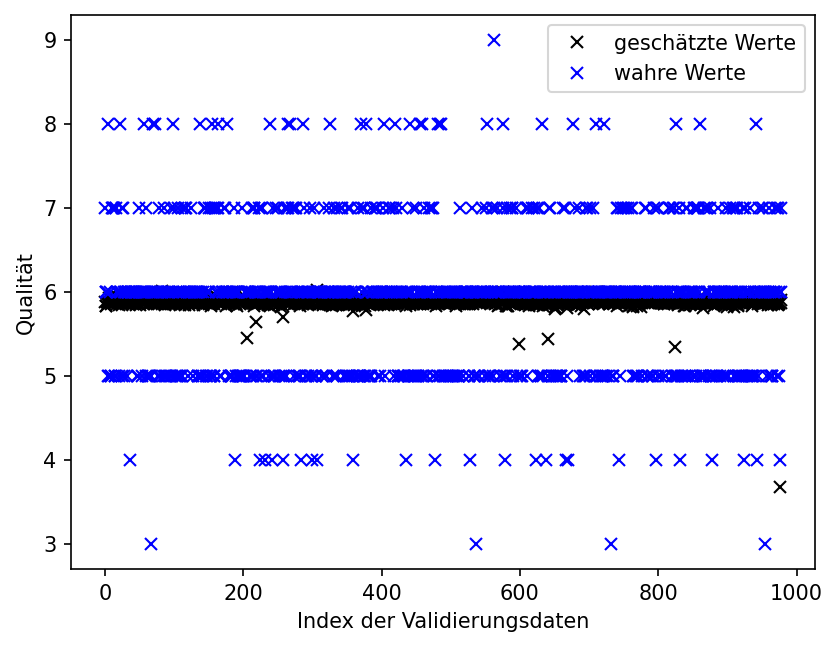

In [5]:
import time
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import OrderedDict



torch.set_printoptions(edgeitems=2, linewidth=75)

values = np.loadtxt('winequality-white.csv',skiprows=1,delimiter=';')

t_u = values[:, 0:11].astype(np.float32)  # INPUT
t_c = values[:, 11].astype(np.float32)    # OUTPUT
t_u = torch.tensor(t_u).unsqueeze(1)
t_c = torch.tensor(t_c).unsqueeze(1)


n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]


t_un_train = t_u_train
t_un_val = t_u_val

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    loss = np.zeros(n_epochs)
    start_time = time.time()  # Startzeitpunkt des Trainings

    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        loss[epoch-1] = loss_val
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
 
            
    end_time = time.time()  # Endzeitpunkt des Trainings
    execution_time = end_time - start_time  # Zeitdauer berechnen
    print("Die Ausführungszeit beträgt: ", execution_time, " Sekunden.")
    return loss 

neuron_count = 800
lr = 1e-4
output_size = 1
input_size = 11  

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(input_size, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, output_size))
]))

optimizer = optim.SGD(seq_model.parameters(), lr)

loss = training_loop(
    n_epochs = 5000, 
    optimizer = optimizer, 
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

results = seq_model(t_u_val)

fig = plt.figure(dpi=150)
plt.xlabel("Index der Validierungsdaten")
plt.ylabel("Qualität")
plt.plot(results[:,0,0].detach().numpy(), 'kx',label = 'geschätzte Werte') 
plt.plot(t_c_val[:,0].detach().numpy(), 'bx',label = 'wahre Werte') 
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

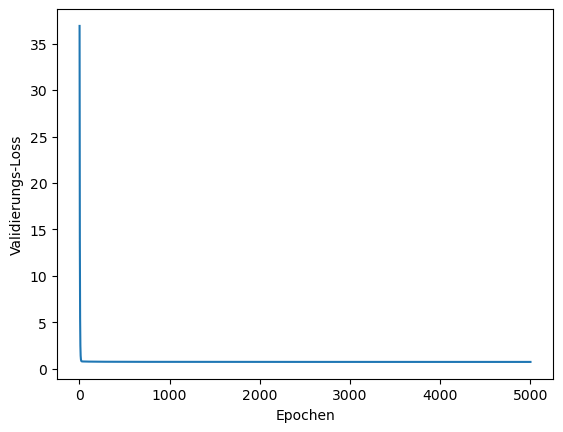

In [3]:
epochs = np.arange(1, 5001, 1)
plt.plot(epochs, loss)
plt.xlabel("Epochen")
plt.ylabel("Validierungs-Loss")
plt.show

Das Training des Netzwerkes dauert ungefähr 8 Minuten und 55 Sekunden. Bei der Dauer des Trainigs spielen Faktoren wie die Anzahl der Schichten des Netzes, die Lernrate, die Größe der Input-Daten, aber auch der Computer mit dem das Netz berechnet wird, eine Rolle. Es ist schwierig für diesen Datensatz eine gute graphische Darstellung zu finden, aufgrund dessen, dass der Output, also die Qualität des Weines von 12 unterschiedlichen Parametern abhängig gemacht wird.